In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')  # Replace with your actual file name
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Data Preprocessing

In [ ]:
# Drop customerID column (not useful for modeling)
data = data.drop('customerID', axis=1, errors='ignore')

In [ ]:
# Convert TotalCharges to numeric (some missing values may be spaces)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
# Convert TotalCharges to numeric (some missing values may be spaces)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
# Handle missing values (fill with median)
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-1410220746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [ ]:
# Encode categorical variables using LabelEncoder for binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
# One-hot encode multiclass columns
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaymentMethod']
data = pd.get_dummies(data, columns=multi_cols, drop_first=True)

Preparing features and target


In [ ]:
# Features and Target
X = data.drop('Churn', axis=1)
y = data['Churn']

Splitting the data

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Scaling numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select numeric columns only
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

Training and Evaluating Logistic Regression

In [ ]:
# Logistic Regression model training
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Prediction and evaluation
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.8055358410220014
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b57924bf3785f7b38d4c969feca4e0b1021f00fef4a88ddfa138c1d8a4420105
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

Setting up lime explainer

In [ ]:
# Create LIME explainer using training data
explainer = LimeTabularExplainer(
    X_train.values,             # Use numpy array of training data
    feature_names=X.columns,    # Feature names from original dataframe
    class_names=['No', 'Yes'],  # Target class names
    mode='classification'
)

In [ ]:
# Choose instance index to explain
i = 0

# Retrieve test instance as numpy array correctly
if isinstance(X_test, pd.DataFrame):
    sample = X_test.iloc[i].values
else:
    sample = X_test[i]

Explaining logistic regression with lime

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


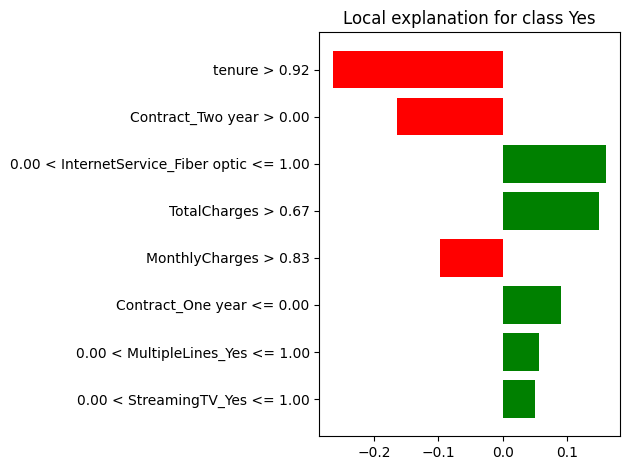

LIME Explanation for Logistic Regression (instance 0):
tenure > 0.92: -0.2636992720258933
Contract_Two year > 0.00: -0.1643499153756009
0.00 < InternetService_Fiber optic <= 1.00: 0.1611665022522663
TotalCharges > 0.67: 0.15001708003594122
MonthlyCharges > 0.83: -0.09725451918778497
Contract_One year <= 0.00: 0.09068403693685442
0.00 < MultipleLines_Yes <= 1.00: 0.05635663115000548
0.00 < StreamingTV_Yes <= 1.00: 0.05003867231782942


In [ ]:
# Explain prediction for Logistic Regression
exp_logreg = explainer.explain_instance(
    sample,
    log_reg.predict_proba,
    num_features=8
)

# White background plot for Logistic Regression explanation
fig_logreg = exp_logreg.as_pyplot_figure()
fig_logreg.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# Print textual explanation for Logistic Regression
print(f"LIME Explanation for Logistic Regression (instance {i}):")
for feature, weight in exp_logreg.as_list():
    print(f"{feature}: {weight}")

Training and Evaluating Svm

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.794180269694819
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Explaining svm with lime

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


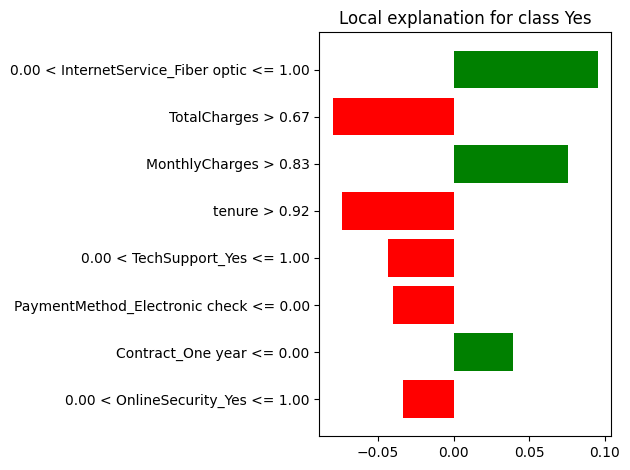

LIME Explanation for SVM (instance 0):
0.00 < InternetService_Fiber optic <= 1.00: 0.09559867299962663
TotalCharges > 0.67: -0.07984720129978393
MonthlyCharges > 0.83: 0.0758280124651385
tenure > 0.92: -0.07366862361006593
0.00 < TechSupport_Yes <= 1.00: -0.04334675014967566
PaymentMethod_Electronic check <= 0.00: -0.04018295498899188
Contract_One year <= 0.00: 0.03958436470160736
0.00 < OnlineSecurity_Yes <= 1.00: -0.03315020062122365


In [ ]:
# Explain prediction for SVM
exp_svm = explainer.explain_instance(
    sample,
    svm.predict_proba,
    num_features=8
)

# White background plot for SVM explanation
fig_svm = exp_svm.as_pyplot_figure()
fig_svm.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# Print textual explanation for SVM
print(f"LIME Explanation for SVM (instance {i}):")
for feature, weight in exp_svm.as_list():
    print(f"{feature}: {weight}")